In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.rbfn as rbfn
import importlib
import sys

sys.path.append('../../src/vi/')
import utils_gen_data

In [2]:
importlib.reload(rbfn)

<module 'src.rbfn' from '/Users/beaucoker/Documents/Harvard_Biostat/CS282/Rotation/toys/cs282-f18-beau_/baselines/doucet/src/rbfn.py'>

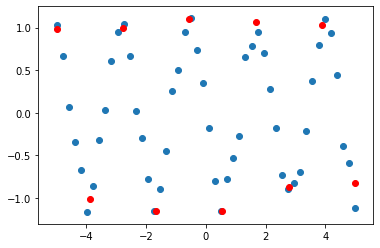

In [3]:
x, x_val, y, y_val, y_scale = utils_gen_data.gen_toy_data_stationary(num_train=50, num_val=10, x_grid=True)
x = x.numpy()
x_val = x_val.numpy()
y = y.numpy()
y_val = y_val.numpy()
y_scale = y_scale.item()

x_pred = np.linspace(-5,5,100)

plt.scatter(x,y)
plt.scatter(x_val, y_val, color='r')

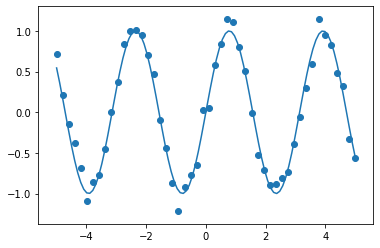

In [4]:
np.random.seed(0)
n_obs = 50
sigma_y = .1

x = np.linspace(-5,5,n_obs)
f = lambda x: np.sin(2*x)
y = f(x) + sigma_y*np.random.normal(0,1,n_obs)

x_pred = np.linspace(-5,5,100)
plt.plot(x_pred, f(x_pred))
plt.scatter(x, y)

In [5]:
np.random.seed(0)
model = rbfn.RBFN(x=x.reshape(-1,1), y=y.reshape(-1,1), k=12, k_fixed=False, gamma_0=.1, nu_0=.1, alpha_del2=2, beta_del2=1, eps1=.5, l=1)


In [6]:
np.random.seed(0)

_ = model.train(n_samp = 10000, n_print = 10) # burn-in

accept, samples = model.train(n_samp = 10000, x_pred=x_pred.reshape(-1,1), n_print = 10, record=True)

/Users/beaucoker/Documents/Harvard_Biostat/CS282/Rotation/toys/cs282-f18-beau_/baselines/doucet/src/rbfn.py:337: RuntimeWarning: Mean of empty slice
  return np.nanmean(accept_unif), np.nanmean(accept_norm)


sample: [1000/10000]
sample: [2000/10000]
sample: [3000/10000]
sample: [4000/10000]
sample: [5000/10000]
sample: [6000/10000]
sample: [7000/10000]
sample: [8000/10000]
sample: [9000/10000]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 50)

In [17]:
self = model
term1a = -0.5*self.c*np.log(2*np.pi) - 0.5*np.sum(np.log(self.sig2))

term1b = 0
DD = self.D[:,self.mask].T@self.D[:,self.mask]
for i in range(self.c):
    Sigma_inv = 1/self.del2[i] * DD
    term1b += -1/(2*self.sig2[i]) * self.alpha[self.mask,i].reshape(1,-1) @ Sigma_inv @ self.alpha[self.mask,i].reshape(-1,1)


In [16]:
self.alpha[:,i].reshape(1,-1)

(1, 50)

In [8]:
model.log_prior()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 50)

In [774]:
print('Acceptance Lam: ', np.mean(accept['Lam']))
print('Acceptance mu (unif): ', np.nanmean(accept['mu_unif']))
print('Acceptance mu (norm): ', np.nanmean(accept['mu_norm']))

if model.k_fixed==False:
    print('Acceptance birth: %.3f (%d)' %(np.nanmean(accept['birth']), np.sum(np.logical_not(np.isnan(accept['birth'])))))
    print('Acceptance death: %.3f (%d)' %(np.nanmean(accept['death']), np.sum(np.logical_not(np.isnan(accept['death'])))))
    print('Acceptance split: %.3f (%d)' %(np.nanmean(accept['split']), np.sum(np.logical_not(np.isnan(accept['split'])))))
    print('Acceptance merge: %.3f (%d)' %(np.nanmean(accept['merge']), np.sum(np.logical_not(np.isnan(accept['merge'])))))
    

Acceptance Lam:  0.6899
Acceptance mu (unif):  0.6352876592007026
Acceptance mu (norm):  0.677424447451511
Acceptance birth: 0.471 (2184)
Acceptance death: 0.675 (1197)
Acceptance split: 0.003 (2131)
Acceptance merge: 0.203 (1116)


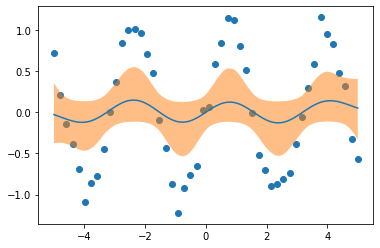

In [776]:
y_pred = np.squeeze(samples['y_pred'])

ci = np.percentile(y_pred, [5, 95], axis=0)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_pred, np.mean(y_pred,0))
ax.fill_between(x_pred, ci[0,:], ci[1,:],alpha=.5)
#plt.ylim(-8,8)

## Start from ground truth

In [853]:
importlib.reload(rbfn)

<module 'src.rbfn' from '/Users/beaucoker/Documents/Harvard_Biostat/CS282/Rotation/toys/cs282-f18-beau_/baselines/doucet/src/rbfn.py'>

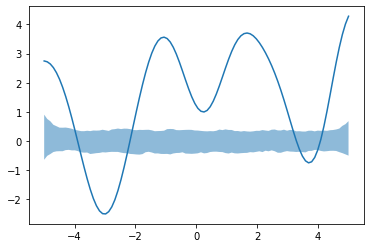

In [854]:
# Samples from prior
model = rbfn.RBFN(x=x, y=y.reshape(-1,1), k=10, k_fixed=True, \
                  gamma_0=2.5, nu_0=1.1, \
                  alpha_del2=2, beta_del2=1, \
                  eps1=.5, eps2=.1)
n_samp = 500
Y = np.zeros((n_samp, x_pred.size))
for i in range(n_samp):
    model.init_parameters()
    Y[i,:] = model.forward(x_pred.reshape(-1,1)).ravel()
    
ci = np.percentile(Y, [5, 95], axis=0)

fig, ax = plt.subplots()
ax.plot(x_pred, np.mean(y_pred,0))
ax.fill_between(x_pred, ci[0,:], ci[1,:],alpha=.5)

[0.0017941]
[16785.97783895]


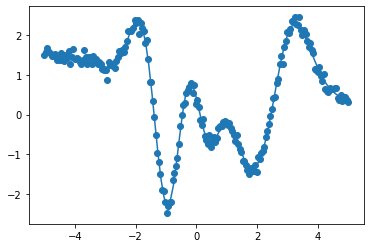

In [1029]:
importlib.reload(rbfn)
np.random.seed(8)
n_obs = 200
sigma_y = .1

# Sample generative function
x = np.linspace(-5,5,n_obs).reshape(-1,1)
y = np.zeros((n_obs,1))
model = rbfn.RBFN(x=x, y=y.reshape(-1,1), k=10, k_fixed=True, \
                  gamma_0=3, nu_0=.01, \
                  alpha_del2=2, beta_del2=30000, \
                  eps1=.5, eps2=.1,\
                  l = 1)

y = model.forward(x) + np.random.normal(0,sigma_y,(n_obs,1))
model.y = y

plt.scatter(x,y)
plt.plot(x_pred,model.forward(x_pred.reshape(-1,1)))
#plt.fill_between(x_pred, ci[0,:], ci[1,:],alpha=.5)

print(model.sig2)
print(model.del2)

In [1008]:
model.log_likelihood()

-613.7602614271229

In [1009]:
np.mean(1/np.random.gamma(model.gamma_0/2, 1/(model.nu_0/2), 100000))

0.010037100393977968

In [1010]:
DD = model.D[:,model.mask].T@model.D[:,model.mask]
DD_inv = np.linalg.pinv(DD)

In [1028]:
print('sig2 mean: ', (model.nu_0/2) / (model.gamma_0/2-1))
print('del2 (signal-to-noise) mean: ', model.beta_del2 / (model.alpha_del2-1))

print('expected width: ', (0.5 + model.eps1)/model.eps2)

sig2 mean:  0.01
del2 (signal-to-noise) mean:  30000.0
expected width:  10.0


In [1021]:
np.random.seed(0)
x_pred = np.linspace(-5,5,100)

#_ = model.train(n_samp = 10000, n_print = 10) # burn-in

accept, samples = model.train(n_samp = 100, x_pred=x_pred.reshape(-1,1), n_print = 10, record=True)

sample: [10/100], accept Lam: 0.000, accept mu (unif): 0.257, accept mu (norm): 0.272
sample: [20/100], accept Lam: 0.000, accept mu (unif): 0.183, accept mu (norm): 0.225
sample: [30/100], accept Lam: 0.000, accept mu (unif): 0.122, accept mu (norm): 0.195
sample: [40/100], accept Lam: 0.000, accept mu (unif): 0.110, accept mu (norm): 0.168
sample: [50/100], accept Lam: 0.000, accept mu (unif): 0.094, accept mu (norm): 0.150
sample: [60/100], accept Lam: 0.000, accept mu (unif): 0.081, accept mu (norm): 0.142
sample: [70/100], accept Lam: 0.000, accept mu (unif): 0.070, accept mu (norm): 0.139
sample: [80/100], accept Lam: 0.000, accept mu (unif): 0.064, accept mu (norm): 0.131
sample: [90/100], accept Lam: 0.000, accept mu (unif): 0.058, accept mu (norm): 0.125


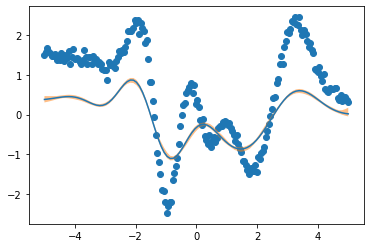

In [1030]:
y_pred = np.squeeze(samples['y_pred'])

ci = np.percentile(y_pred, [5, 95], axis=0)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_pred, np.mean(y_pred,0))
ax.fill_between(x_pred, ci[0,:], ci[1,:],alpha=.5)

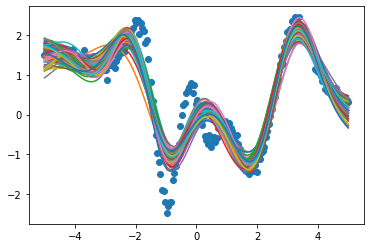

In [1014]:
y_pred = np.squeeze(samples['y_pred'])

ci = np.percentile(y_pred, [5, 95], axis=0)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_pred, np.mean(y_pred,0))

_=ax.plot(x_pred, y_pred.T)
#ax.fill_between(x_pred, ci[0,:], ci[1,:],alpha=.5)

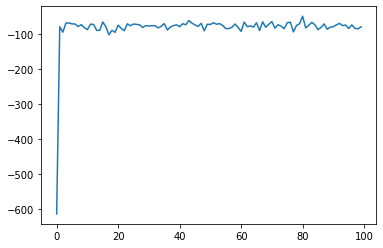

In [1015]:
plt.plot(samples['log_likelihood'])

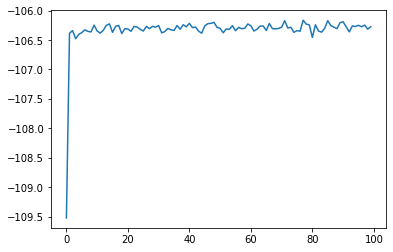

In [1016]:
plt.plot(samples['log_prior'])

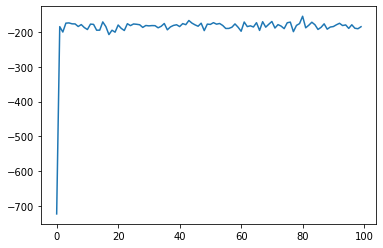

In [1017]:
plt.plot(samples['log_prior'] + samples['log_likelihood'])

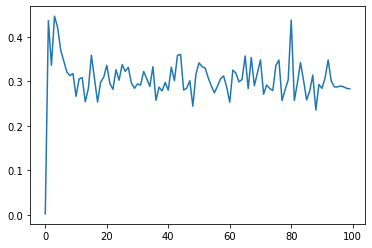

In [1003]:
plt.plot(samples['sig2'])

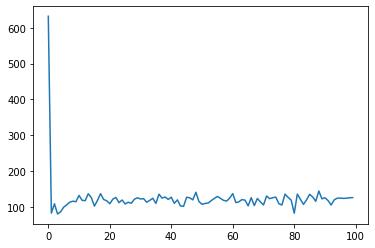

In [1004]:
plt.plot(-model.N/2 * np.log(samples['sig2']))

In [1005]:
model.log_likelihood()

-64.08620640261512

## Prior

In [1006]:
def plot_upcrossings(x,f,u=None,bins=30,ax=None):
	if u is None:
		u = np.mean(f,0)

	up = np.logical_and(f[:,:-1]<u[:-1], f[:,1:]>u[1:])
	idx_up = [np.where(row)[0] for row in up]
	x_up = x.ravel()[np.concatenate(idx_up)]


	if ax is None:
		fig, ax = plt.subplots()
	else:
		fig=None

	ax.hist(x_up, bins=bins, weights=np.full(x_up.size,1/f.shape[0]))
	ax.set_title('Upcrossings')
	ax.set_xlabel(r'$x$')
	return fig

In [705]:
def plot_stationarity(x,f,h):

	# Distances between points
	dx = x[1:] - x[:-1]
	if dx.max() - dx.min() > 1e2 or np.any(dx<0):
		print('x needs to be increasing and evenly spaced')
		return
	dx = np.cumsum(np.concatenate([np.array([0]),dx]))
	h_idx = np.argmin(np.abs(dx - h[:,np.newaxis]),axis=1) #Closest multiple of dx to h

	# Covariances at offset h
	C = np.cov(f.T)
	Ch = [np.diagonal(C,offset=h) for h in h_idx]

	#Ch_mat = np.array([np.concatenate([row,np.full(x.size - row.size,np.nan)]) for row in Ch])
	pad = [(int(np.floor((x.size-row.size)/2)),int(np.ceil((x.size-row.size)/2))) for row in Ch]
	Ch_mat = np.array([\
		np.concatenate([np.full(p[0],np.nan), row,np.full(p[1],np.nan)]) \
		for (p,row) in zip(pad,Ch)])

	# Mean
	#mean = np.mean(f, axis=0)

	# Figure
	fig, ax = plt.subplots()
	ax.plot(x, Ch_mat.T,'o-')
	#ax.plot(x, mean, 'o-')
	#ax.legend(['h=%.1f, var=%.2E' % (h,stat) for h,stat in zip(dx[h_idx],sta_stat)] + ['Mean'])
	#ax.legend(['h=%.1f' % h for h in dx[h_idx]] + ['Mean'])
	ax.legend(['k=%.1f' % h for h in dx[h_idx]])

	ax.set_xlabel(r'$x$')
	#ax.set_ylabel('Cov'+r'$(x-k/2, x+k/2)$')
	#ax.set_title('Stationarity')

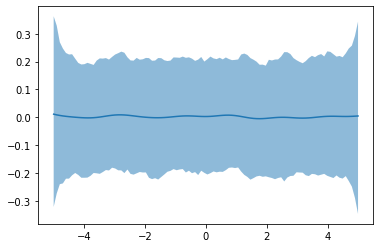

In [826]:
# Samples from prior
importlib.reload(rbfn)
np.random.seed(0)
model = rbfn.RBFN(x=x, y=y.reshape(-1,1), k=10, k_fixed=True, \
                  gamma_0=3, nu_0=.1, \
                  alpha_del2=2, beta_del2=5, \
                  eps1=.5, eps2=.1,\
                  l = 1)
n_samp = 1000
Y = np.zeros((n_samp, x_pred.size))
for i in range(n_samp):
    model.init_parameters()
    Y[i,:] = model.forward(x_pred.reshape(-1,1)).ravel()
    
ci = np.percentile(Y, [5, 95], axis=0)

fig, ax = plt.subplots()
ax.plot(x_pred, np.mean(Y,0))
ax.fill_between(x_pred, ci[0,:], ci[1,:],alpha=.5)

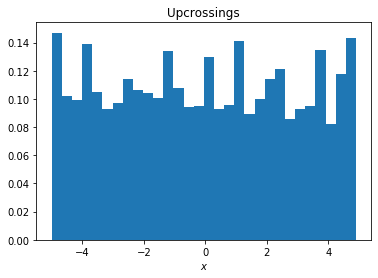

In [827]:
_=plot_upcrossings(x_pred,Y,u=np.zeros(x_pred.size),bins=30)

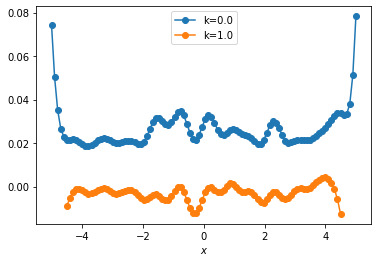

In [823]:
_=plot_stationarity(x_pred,Y,h=np.array([0,1]))